## Title: Kickstarter success explorations
### Team Members: Connor Bennett< anghel Carillo, Kristopher Church

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
input_file = 'https://raw.githubusercontent.com/connor-bennett/Proejct-Two/refs/heads/main/kickstarter-projects/ks-projects-201801.csv'
df = pd.read_csv(input_file)

# Explorations

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
### how many missing values are there?
### Fill missing names as Unknown

In [7]:
# Check how many missing values are in each column
print(df.isna().sum())

# For 'name', decide how to handle missing values
df['name'] = df['name'].fillna('Unknown')  # Replace missing names with 'Unknown'

# Verify that there are no more missing values
print(df.isna().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
ID                     0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [8]:
# Convert dates to datetime

In [9]:
# Convert 'deadline' and 'launched' to datetime if not already
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

# Verify the data types
print(df.dtypes)


ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object


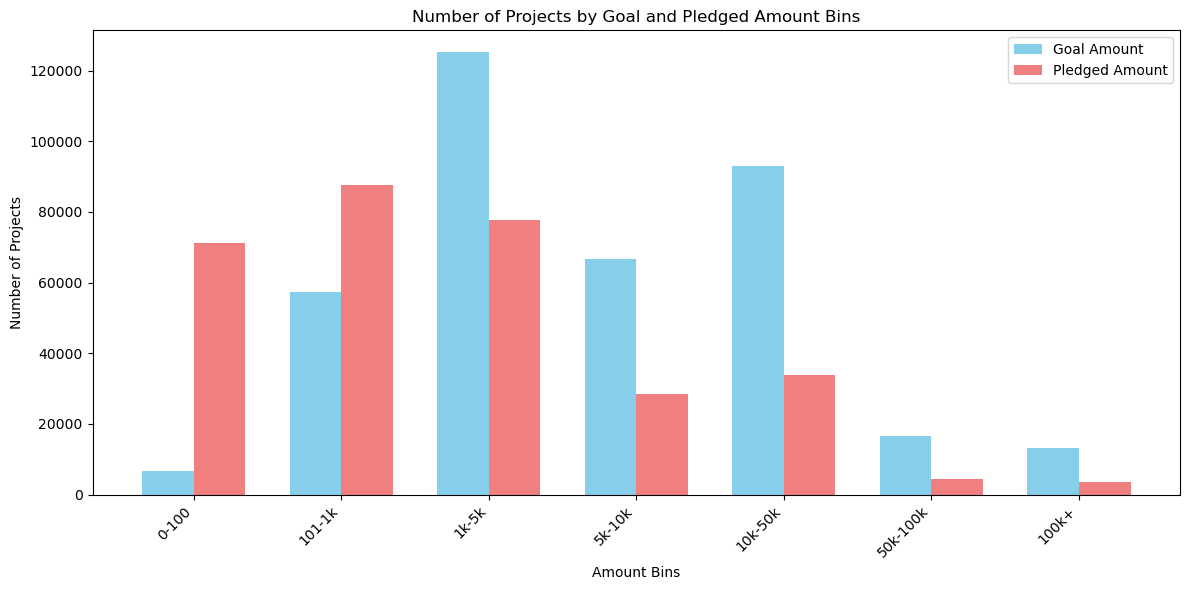

In [16]:
# Step 1: Create bins and labels for both 'goal' and 'usd pledged'
bins = [0, 100, 1000, 5000, 10000, 50000, 100000, np.inf]
labels = ['0-100', '101-1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k+']

# Add goal_bins and pledged_bins columns to the DataFrame
df['goal_bins'] = pd.cut(df['goal'], bins=bins, labels=labels)
df['pledged_bins'] = pd.cut(df['usd pledged'], bins=bins, labels=labels)

# Step 2: Count the values in each bin
goal_counts = df['goal_bins'].value_counts(sort=False)
pledged_counts = df['pledged_bins'].value_counts(sort=False)

# Step 3: Create a combined bar plot
x = np.arange(len(goal_counts))  # the label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))

# Plot goal bins
plt.bar(x - width/2, goal_counts, width, label='Goal Amount', color='skyblue')

# Plot pledged bins
plt.bar(x + width/2, pledged_counts, width, label='Pledged Amount', color='lightcoral')

# Add labels, title, and legend
plt.title("Number of Projects by Goal and Pledged Amount Bins")
plt.xlabel("Amount Bins")
plt.ylabel("Number of Projects")
plt.xticks(x, labels=goal_counts.index, rotation=45, ha='right')  # Set x-tick labels and rotate
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()